# Multi linear regression 

We want to compute a multi linear regression between the parameter values for each perturbation and the PCs values of the first EOF analysis of radiative feedbacks (SW and LW multivariate analysis). 

#### Emulator equation : Y = f(X) 
* Y is a 1x50 matrix containing the PCs values of the first EOF analysis of radiative feedbacks (SW and LW multivariate analysis).
* X is a 30X50 matrix containing the 30 values of the physical parameters, for the 50 perturbations.

## Import modules

In [2]:
# Computational modules 
%matplotlib inline
import xarray as xr
import glob
import os
import numpy as np
import netCDF4
from netCDF4 import Dataset
import pandas as pd
import re
from array import array
from pylab import *

# Plotting modules 
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
import pandas.plotting
import matplotlib.ticker as ticker
# scatter plot matrix des variables quantitatives
from pandas.plotting import scatter_matrix
import seaborn as sns; sns.set()

# Scikit-learn
from sklearn import linear_model
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

## Import functions

In [3]:
import sys
sys.path.append('/data/home/globc/peatier/CNRMppe')
import Fonctions
from Fonctions import get_wavg_budget_df
from Fonctions import wavg 
from Fonctions import plotlines_Xdf
from Fonctions import plotlines_1df
from Fonctions import Deltas_Lambda
from Fonctions import get_3D_budget_xarr
from Fonctions import get_3D_xarr
from Fonctions import get_3D_SW_xarr
from Fonctions import get_3D_LW_xarr

## Lasso Model (multi linear regression, Cross-Validation)

In [252]:
# Set the X and Y : Y = f(X)
X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/X_EmulateurFeedbacksN.npy")
y = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/PPE2_EOF1pc_N.npy")
#y = np.load(file = "/data/home/globc/peatier/CNRMppe/PPE/files/npy/Net_feedbacks.npy")
param_names = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/LHS_paramNames.npy")

Computing regularization path using the coordinate descent lasso...


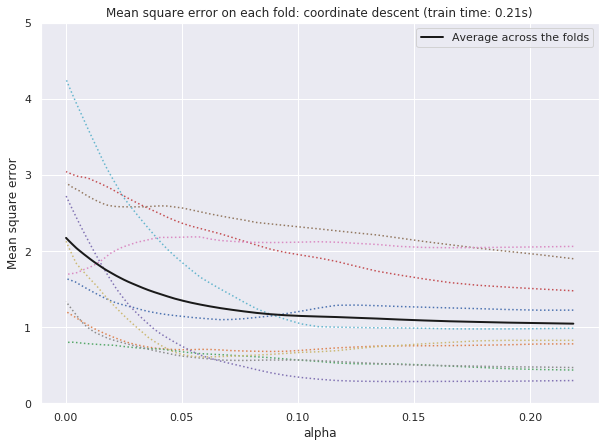

In [253]:
# LassoCV: coordinate descent

# Compute paths
print("Computing regularization path using the coordinate descent lasso...")
t1 = time.time()
model = LassoCV(cv=10).fit(X, y)
t_lasso_cv = time.time() - t1

# Display results
alphas = model.alphas_

plt.figure(figsize=(10, 7))
ymin, ymax = 0, 5
xmin, xmax = 0, 0.5
plt.plot(alphas, model.mse_path_, ':')
plt.plot(alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
#plt.axvline(model.alpha_, linestyle='--', color='k',
#            label='alpha: CV estimate')

plt.legend()

plt.xlabel('alpha')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent '
          '(train time: %.2fs)' % t_lasso_cv)
plt.axis('tight')
plt.ylim(ymin, ymax)
#plt.xlim(xmin, xmax)

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/PPE_Lasso_CV.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

Computing regularization path using the coordinate descent lasso...


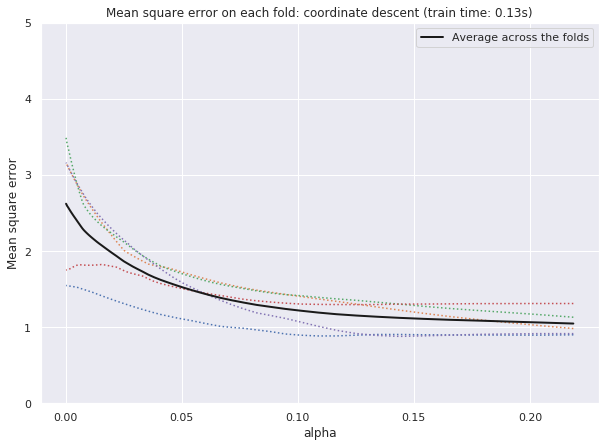

In [254]:
# LassoCV: coordinate descent

# Compute paths
print("Computing regularization path using the coordinate descent lasso...")
t1 = time.time()
model = LassoCV(cv=5).fit(X, y)
t_lasso_cv = time.time() - t1

# Display results
alphas = model.alphas_

plt.figure(figsize=(10, 7))
ymin, ymax = 0, 5
xmin, xmax = 0, 0.5
plt.plot(alphas, model.mse_path_, ':')
plt.plot(alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
#plt.axvline(model.alpha_, linestyle='--', color='k',
#            label='alpha: CV estimate')

plt.legend()

plt.xlabel('alpha')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent '
          '(train time: %.2fs)' % t_lasso_cv)
plt.axis('tight')
plt.ylim(ymin, ymax)
#plt.xlim(xmin, xmax)

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/PPE_Lasso_CV5.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

In [255]:
alpha = 0.10

In [256]:
# Perform the lasso multi linear regression with the alpha found before
lasso = Lasso(alpha=alpha)

lasso.fit(X, y)

print(lasso)
print('Intercept: \n', lasso.intercept_)
print('Coefficients: \n', lasso.coef_)
print('Score: \n', lasso.score(X, y))

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Intercept: 
 6.354906946391779e-09
Coefficients: 
 [ 0.         -0.04192565 -0.          0.05650559 -0.06484314 -0.11746733
 -0.08642291  0.         -0.         -0.         -0.          0.
 -0.          0.00753895 -0.         -0.00867926 -0.04171344  0.
 -0.          0.0793024  -0.         -0.          0.         -0.00657696
 -0.         -0.         -0.03726315 -0.         -0.          0.        ]
Score: 
 0.15050454968323634


In [257]:
Coeffs = pd.DataFrame([lasso.coef_], columns=param_names).iloc[0]
Coeffs
#Coeffs_sorted = Coeffs.sort_values()
#Coeffs_sorted

AKN            0.000000
ALPHAT        -0.041926
ALD           -0.000000
ALMAVE         0.056506
AGREF         -0.064843
AGRE1         -0.117467
AGRE2         -0.086423
RAUTEFR        0.000000
RQLCR         -0.000000
RAUTEFS       -0.000000
RQICRMIN      -0.000000
RQICRMAX       0.000000
TFVL          -0.000000
TFVI           0.007539
TFVR          -0.000000
TFVS          -0.008679
RKDN          -0.041713
RKDX           0.000000
TENTR         -0.000000
TENTRX         0.079302
VVN           -0.000000
VVX           -0.000000
ALFX           0.000000
FNEBC         -0.006577
GCTURB        -0.000000
RLWINHF_ICE   -0.000000
RLWINHF_LIQ   -0.037263
RSWINHF_ICE   -0.000000
RSWINHF_LIQ   -0.000000
REFLCAPE       0.000000
Name: 0, dtype: float64

In [258]:
# Let's write the equation : 
X_df = pd.DataFrame(data=X)
R = lasso.intercept_

N=len(X_df.values)
tmp = [0]*N
y_eq_tmp = [0]*N
i=0
Ycpt=0
while i<N:
    tmp[i] = Coeffs.values*X_df.iloc[i]
    y_eq_tmp[i] = tmp[i].sum()+R
    i+=1
    
y_eq 

array([-0.61000869, -0.60969464, -0.76936263, -0.21024424, -0.60212655,
       -0.6027048 ,  0.24594154,  0.48693685,  0.11017153,  0.97766292,
        1.10091517, -0.35079591,  0.1781786 , -0.28202876, -0.24711895,
        0.44186797, -0.25403392,  0.57055667,  0.05506797, -0.35614894,
        0.06810123,  0.04809083, -0.0544362 ,  1.2223251 ,  0.39532895,
        0.55403613, -0.0731728 , -0.08531174, -1.17689238,  0.89653025,
        0.55751707,  0.23997093, -0.32593325,  0.27626739,  0.00879334,
       -0.42922932,  0.06151094,  0.07884373,  0.96678778, -0.77493089,
       -0.38380611, -0.53311085, -0.96811646,  0.27093406, -2.25741451,
        1.27192434, -0.74366816,  0.68132683, -0.54015484,  0.5116387 ,
        0.02406824,  0.26020707,  0.63721861, -0.13632678, -0.37130619,
        0.35801875, -0.25899635, -0.57694099,  0.24970226,  0.09938158,
        0.98370723, -0.24241338, -1.03566564,  0.72125394, -0.09936098,
       -0.38074895,  0.65773192,  0.07368885])

In [264]:
nb_p_list = ['p311', 'p312', 'p314', 'p316',
                    'p317', 'p319', 'p320', 'p321', 'p322', 'p324', 'p325', 'p326', 
                    'p329', 'p330', 'p331', 'p332', 'p335', 'p336', 'p337' ,'p338', 
                    'p340', 'p341', 'p343', 'p344', 'p346', 'p347', 'p348', 'p349', 
                    'p350', 'p353', 'p355', 'p357', 'p359', 'p360', 
                    'p361', 'p363', 'p365', 'p367', 'p368', 'p369', 
                    'p372', 'p373', 'p374', 'p375', 'p376', 'p378', 'p381', 'p382', 
                    'p384', 'p386', 'p388', 'p389', 'p391', 'p392', 'p393', 
                    'p394', 'p395', 'p396', 'p398', 'p399', 'p400', 'p404', 
                    'p406', 'p407', 'p409', 'p410', 'p411', 'p412']

y_true = y

DFYeq = pd.DataFrame([y_true, y_eq], index=['y_true', 'y_eq']).transpose()
DFYeq['members'] = nb_p_list
#DF=DFYeq.sort_values(by='y_true')
DFYeq

,y_true,y_eq,members
0,-1.998167,-0.610009,p311
1,-0.124049,-0.609695,p312
2,-1.265448,-0.769363,p314
3,-0.476514,-0.210244,p316
4,-1.225279,-0.602127,p317
...,...,...,...
63,1.377269,0.721254,p407
64,-0.289828,-0.099361,p409
65,0.953056,-0.380749,p410
66,1.349160,0.657732,p411


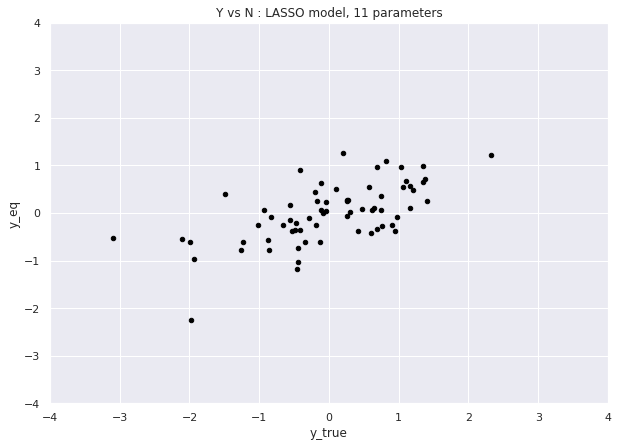

In [262]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

#print('Coefficient of determination: %.2f'
#      % r2_score(X_test, y_pred))

ax = plt.gca()
title = 'Y vs N : LASSO model, 11 parameters'
DFYeq.plot(kind='scatter', x='y_true', y='y_eq', color='black', figsize=(10, 7), 
                     style='.', ax = ax)
#plt.plot(X_test, y_pred_lasso, color='blue', linewidth=1.0)

plt.xlabel('y_true')
plt.ylabel('y_eq')
plt.title(title)
plt.xlim(-4, 4)
plt.ylim(-4, 4)

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/PPE2_Lasso_12.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

Coefficients: 
 [[0.4051772]]
Coefficient of determination: 0.62


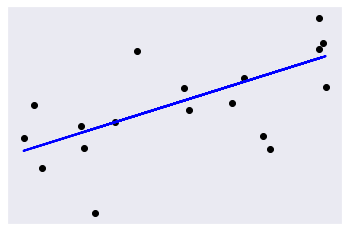

In [263]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training/testing sets
X_train = y_true[:50].reshape(-1, 1)
X_test = y_true[50:].reshape(-1, 1)

# Split the targets into training/testing sets
y_train = y_pred[:50].values.reshape(-1, 1) 
y_test = Yeq[50:].values.reshape(-1, 1)
#y_train

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
#print('Mean squared error: %.2f'
#      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(X_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=2.0)

plt.xticks(())
plt.yticks(())

plt.show()

## Multi Linear Regression model

In [265]:
# Set the X and Y : Y = f(X)
X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/X_EmulateurFeedbacksN.npy")
y = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/PPE2_EOF1pc_N.npy")
#y = np.load(file = "/data/home/globc/peatier/CNRMppe/PPE/files/npy/Net_feedbacks.npy")
param_names = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/LHS_paramNames.npy")

In [266]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
print('Score: \n', regr.score(X, y))

Intercept: 
 6.354906773970123e-09
Coefficients: 
 [ 0.04619122 -0.27009904 -0.088646    0.24111044 -0.18931106 -0.26202982
 -0.29127411  0.15855108 -0.15516633 -0.14910383 -0.07500279  0.08337174
  0.13728832  0.16549353 -0.06727963 -0.12707827 -0.17097447  0.07035172
 -0.07153689  0.24457719 -0.09819599 -0.23390607  0.02982761 -0.03452893
 -0.03169522  0.01933969 -0.0871433  -0.18694196  0.0050463  -0.00508882]
Score: 
 0.3912398960423288


In [267]:
Coeffs = pd.DataFrame([regr.coef_]*30, columns=param_names).iloc[0]
Coeffs_sorted = Coeffs.sort_values()
Coeffs_sorted

AGRE2         -0.291274
ALPHAT        -0.270099
AGRE1         -0.262030
VVX           -0.233906
AGREF         -0.189311
RSWINHF_ICE   -0.186942
RKDN          -0.170974
RQLCR         -0.155166
RAUTEFS       -0.149104
TFVS          -0.127078
VVN           -0.098196
ALD           -0.088646
RLWINHF_LIQ   -0.087143
RQICRMIN      -0.075003
TENTR         -0.071537
TFVR          -0.067280
FNEBC         -0.034529
GCTURB        -0.031695
REFLCAPE      -0.005089
RSWINHF_LIQ    0.005046
RLWINHF_ICE    0.019340
ALFX           0.029828
AKN            0.046191
RKDX           0.070352
RQICRMAX       0.083372
TFVL           0.137288
RAUTEFR        0.158551
TFVI           0.165494
ALMAVE         0.241110
TENTRX         0.244577
Name: 0, dtype: float64

In [268]:
# Let's write the equation : 
X_df = pd.DataFrame(data=X)
R = lasso.intercept_

N=len(X_df.values)
tmp = [0]*N
y_eq_tmp = [0]*N
i=0
Ycpt=0
while i<N:
    tmp[i] = Coeffs.values*X_df.iloc[i]
    y_eq_tmp[i] = tmp[i].sum()+R
    i+=1
    
y_eq 

array([-0.61000869, -0.60969464, -0.76936263, -0.21024424, -0.60212655,
       -0.6027048 ,  0.24594154,  0.48693685,  0.11017153,  0.97766292,
        1.10091517, -0.35079591,  0.1781786 , -0.28202876, -0.24711895,
        0.44186797, -0.25403392,  0.57055667,  0.05506797, -0.35614894,
        0.06810123,  0.04809083, -0.0544362 ,  1.2223251 ,  0.39532895,
        0.55403613, -0.0731728 , -0.08531174, -1.17689238,  0.89653025,
        0.55751707,  0.23997093, -0.32593325,  0.27626739,  0.00879334,
       -0.42922932,  0.06151094,  0.07884373,  0.96678778, -0.77493089,
       -0.38380611, -0.53311085, -0.96811646,  0.27093406, -2.25741451,
        1.27192434, -0.74366816,  0.68132683, -0.54015484,  0.5116387 ,
        0.02406824,  0.26020707,  0.63721861, -0.13632678, -0.37130619,
        0.35801875, -0.25899635, -0.57694099,  0.24970226,  0.09938158,
        0.98370723, -0.24241338, -1.03566564,  0.72125394, -0.09936098,
       -0.38074895,  0.65773192,  0.07368885])

In [269]:
nb_p_list = ['p311', 'p312', 'p314', 'p316',
                    'p317', 'p319', 'p320', 'p321', 'p322', 'p324', 'p325', 'p326', 
                    'p329', 'p330', 'p331', 'p332', 'p335', 'p336', 'p337' ,'p338', 
                    'p340', 'p341', 'p343', 'p344', 'p346', 'p347', 'p348', 'p349', 
                    'p350', 'p353', 'p355', 'p357', 'p359', 'p360', 
                    'p361', 'p363', 'p365', 'p367', 'p368', 'p369', 
                    'p372', 'p373', 'p374', 'p375', 'p376', 'p378', 'p381', 'p382', 
                    'p384', 'p386', 'p388', 'p389', 'p391', 'p392', 'p393', 
                    'p394', 'p395', 'p396', 'p398', 'p399', 'p400', 'p404', 
                    'p406', 'p407', 'p409', 'p410', 'p411', 'p412']

y_true = y

DFYeq = pd.DataFrame([y_true, y_eq], index=['y_true', 'y_eq']).transpose()
DFYeq['members'] = nb_p_list
#DF=DFYeq.sort_values(by='y_true')
DFYeq

,y_true,y_eq,members
0,-1.998167,-0.610009,p311
1,-0.124049,-0.609695,p312
2,-1.265448,-0.769363,p314
3,-0.476514,-0.210244,p316
4,-1.225279,-0.602127,p317
...,...,...,...
63,1.377269,0.721254,p407
64,-0.289828,-0.099361,p409
65,0.953056,-0.380749,p410
66,1.349160,0.657732,p411


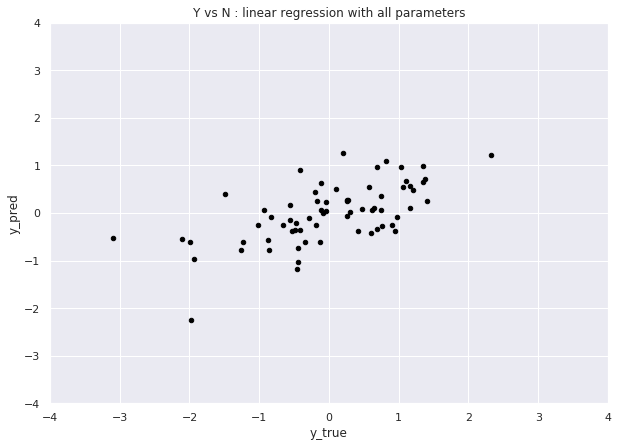

In [271]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

ax = plt.gca()
title = 'Y vs N : linear regression with all parameters'
DFYeq.plot(kind='scatter', x='y_true', y='y_eq', color='black', figsize=(10, 7), 
                     style='.', ax = ax)
#plt.plot(X_test, y_pred, color='blue', linewidth=1.0)

plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.title(title)
plt.xlim(-4,4)
plt.ylim(-4,4)

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/PPE_MultiLinReg_all.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

In [273]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training/testing sets
X_train = y_true[:50].reshape(-1, 1)
X_test = y_true[50:].reshape(-1, 1)

# Split the targets into training/testing sets
y_train = y_pred[:50].reshape(-1, 1) 
y_test = y_pred[50:].reshape(-1, 1)
#y_train

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
#print('Mean squared error: %.2f'
#      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=2.0)

plt.xticks(())
plt.yticks(())

plt.show()

AttributeError: 'Series' object has no attribute 'reshape'

## Multi Linear Regression model : prediction

In [171]:
LHS = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/LHS1000_param.npy")
LHS_df = pd.DataFrame(LHS)

lhs = LHS_df.values
LHS_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.565172,0.994695,-0.389752,-1.209212,-1.053494,0.713304,1.051234,-1.713772,1.301493,0.193472,...,1.013497,1.176859,-1.066320,-0.989915,0.984342,-1.464698,1.672806,-1.124501,-1.348892,-1.298346
1,-0.607856,1.074172,0.930665,0.149216,0.284487,1.630226,1.254728,-1.113082,-1.429732,-1.703882,...,1.237156,1.142672,0.403526,-1.631440,-0.908980,0.635131,-0.399331,-1.598175,-1.121259,-0.252785
2,1.197689,-1.034007,-0.003275,-0.380187,-1.692290,0.546502,-0.566150,-0.455078,-1.188444,0.092375,...,0.577240,0.570916,0.469380,-1.259347,0.805844,-1.069435,-1.469087,-0.057380,-1.278698,0.003951
3,-0.591012,1.161000,1.151455,0.220174,1.025016,1.326794,-0.168701,1.725910,0.434731,0.256193,...,1.678255,-0.533409,1.153710,0.992228,-1.697355,1.239907,0.433749,1.123067,-0.386052,-1.133018
4,-0.568184,-0.911097,-0.531358,-0.314841,-0.977614,1.258632,0.456134,0.394475,-0.927458,0.939614,...,1.621157,0.838729,1.537567,0.820279,0.346069,-1.492503,0.064010,-0.977250,0.913109,-1.307766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.050921,-1.040621,-1.645828,-1.601167,0.998878,-1.717096,0.366971,-1.172354,0.427040,-1.012340,...,-0.721435,0.289542,0.609493,0.552108,0.023283,0.031093,-0.389465,1.379774,0.727080,0.826987
996,1.388490,0.486936,-0.282358,0.450882,0.326523,-0.860082,-0.101825,-1.164841,0.253586,1.666030,...,0.124414,-0.825168,1.482591,1.023450,-1.365154,-0.705285,-0.468126,-1.063751,-1.678253,1.142211
997,0.074900,-0.396218,0.940055,-0.443194,-0.535519,0.711117,1.177926,1.466776,0.596664,-0.031375,...,0.164730,1.522576,1.054532,0.255291,-1.338608,-0.330210,0.966779,-1.457269,0.731497,-0.071212
998,-1.087803,-1.230690,0.774113,1.509690,0.438399,1.205506,-1.073673,-1.479586,1.685155,-0.144882,...,-0.533247,1.450139,1.211890,0.634079,1.242793,-0.402700,0.866732,-0.209826,1.028537,-0.728988


In [176]:
LHS_df.iloc[0]

0     1.565172
1     0.994695
2    -0.389752
3    -1.209212
4    -1.053494
5     0.713304
6     1.051234
7    -1.713772
8     1.301493
9     0.193472
10   -0.603535
11   -0.625857
12    0.188690
13    0.661242
14   -0.948693
15    0.305066
16    1.581328
17    0.388643
18   -0.062883
19   -0.123686
20    1.013497
21    1.176859
22   -1.066320
23   -0.989915
24    0.984342
25   -1.464698
26    1.672806
27   -1.124501
28   -1.348892
29   -1.298346
Name: 0, dtype: float64

In [180]:
# Let's use the model equation : 

y_pred_tmp = [0]*N
i=0
Ycpt=0
N=len(lhs)
while i<N:
    y_pred_tmp[i] = Coeffs.values*LHS_df.iloc[i]
    i+=1
    
y_pred=y_pred_tmp+R
y_pred

array([[ 7.22972160e-02, -2.68666029e-01,  3.45499694e-02, ...,
         2.10216405e-01, -6.80691018e-03,  6.60705932e-03],
       [-2.80775867e-02, -2.90132905e-01, -8.24996937e-02, ...,
         2.98765941e-01, -5.65820537e-03,  1.28638660e-03],
       [ 5.53227167e-02,  2.79284276e-01,  2.90333154e-04, ...,
         1.07267666e-02, -6.45269210e-03, -2.00986275e-05],
       ...,
       [ 3.45973307e-03,  1.07018212e-01, -8.33320615e-02, ...,
         2.72424773e-01,  3.69136390e-03,  3.62389496e-04],
       [-5.02469567e-02,  3.32408129e-01, -6.86219667e-02, ...,
         3.92253727e-02,  5.19031600e-03,  3.70969677e-03],
       [ 3.63541636e-02,  3.63723134e-01,  3.82969204e-02, ...,
         8.42628368e-02,  3.32865114e-03,  1.85565137e-03]])

In [159]:
nb_p_list = ['p311', 'p312', 'p314', 'p316',
                    'p317', 'p319', 'p320', 'p321', 'p322', 'p324', 'p325', 'p326', 
                    'p329', 'p330', 'p331', 'p332', 'p335', 'p336', 'p337' ,'p338', 
                    'p340', 'p341', 'p343', 'p344', 'p346', 'p347', 'p348', 'p349', 
                    'p350', 'p353', 'p355', 'p357', 'p359', 'p360', 
                    'p361', 'p363', 'p365', 'p367', 'p368', 'p369', 
                    'p372', 'p373', 'p374', 'p375', 'p376', 'p378', 'p381', 'p382', 
                    'p384', 'p386', 'p388', 'p389', 'p391', 'p392', 'p393', 
                    'p394', 'p395', 'p396', 'p398', 'p399', 'p400', 'p404', 
                    'p406', 'p407', 'p409', 'p410', 'p411', 'p412']

Y_df = pd.DataFrame(data=y)
y_true = Y_df[0]
y_true

DFYpred = pd.DataFrame([y_pred, y_true], index=["y_pred", "y_true"]).transpose()
DFYpred['members'] = nb_p_list
Ypred=DFYpred.sort_values(by='y_true')
Ypred

,y_pred,y_true,members
41,NaN,-3.095809,p373
48,NaN,-2.101746,p384
0,0.843164,-1.998167,p311
44,NaN,-1.976700,p376
42,NaN,-1.937713,p374
...,...,...,...
60,NaN,1.345080,p400
66,NaN,1.349160,p411
63,NaN,1.377269,p407
51,NaN,1.399186,p389


In [160]:
nb_p_list = ['p311', 'p312', 'p314', 'p316',
                    'p317', 'p319', 'p320', 'p321', 'p322', 'p324', 'p325', 'p326', 
                    'p329', 'p330', 'p331', 'p332', 'p335', 'p336', 'p337' ,'p338', 
                    'p340', 'p341', 'p343', 'p344', 'p346', 'p347', 'p348', 'p349', 
                    'p350', 'p353', 'p355', 'p357', 'p359', 'p360', 
                    'p361', 'p363', 'p365', 'p367', 'p368', 'p369', 
                    'p372', 'p373', 'p374', 'p375', 'p376', 'p378', 'p381', 'p382', 
                    'p384', 'p386', 'p388', 'p389', 'p391', 'p392', 'p393', 
                    'p394', 'p395', 'p396', 'p398', 'p399', 'p400', 'p404', 
                    'p406', 'p407', 'p409', 'p410', 'p411', 'p412']

Y_df = pd.DataFrame(data=y)
N = Y_df[0]
N

DFYeq = pd.DataFrame([Yeq, N], index=["Yeq", "N"]).transpose()
DFYeq['members'] = nb_p_list
DF=DFYeq.sort_values(by='N')
DF

,Yeq,N,members
41,-0.533111,-3.095809,p373
48,-0.540155,-2.101746,p384
0,-0.610009,-1.998167,p311
44,-2.257415,-1.976700,p376
42,-0.968116,-1.937713,p374
...,...,...,...
60,0.983707,1.345080,p400
66,0.657732,1.349160,p411
63,0.721254,1.377269,p407
51,0.260207,1.399186,p389


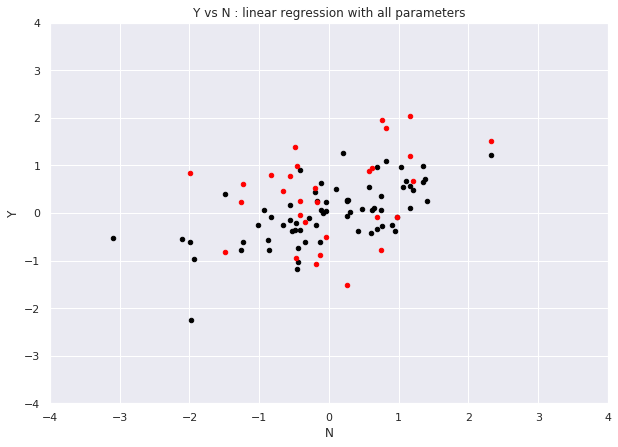

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

ax = plt.gca()
title = 'Y vs N : linear regression with all parameters'
DF.plot(kind='scatter', x='N', y='Yeq', color='black', figsize=(10, 7), 
                     style='.', ax = ax)
Ypred.plot(kind='scatter', x='y_true', y='y_pred', color='red', figsize=(10, 7), 
                     style='.', ax = ax)
#plt.plot(X_test, y_pred, color='blue', linewidth=1.0)

plt.xlabel('N')
plt.ylabel('Y')
plt.title(title)
plt.xlim(-4,4)
plt.ylim(-4,4)

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/PPE_MultiLinReg_all.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()